In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statistics as stat

In [2]:
df = pd.read_csv('housing.csv')
df.shape[0]

20640

In [3]:
df = df[df['median_house_value'] > 0]
df.shape[0]

20640

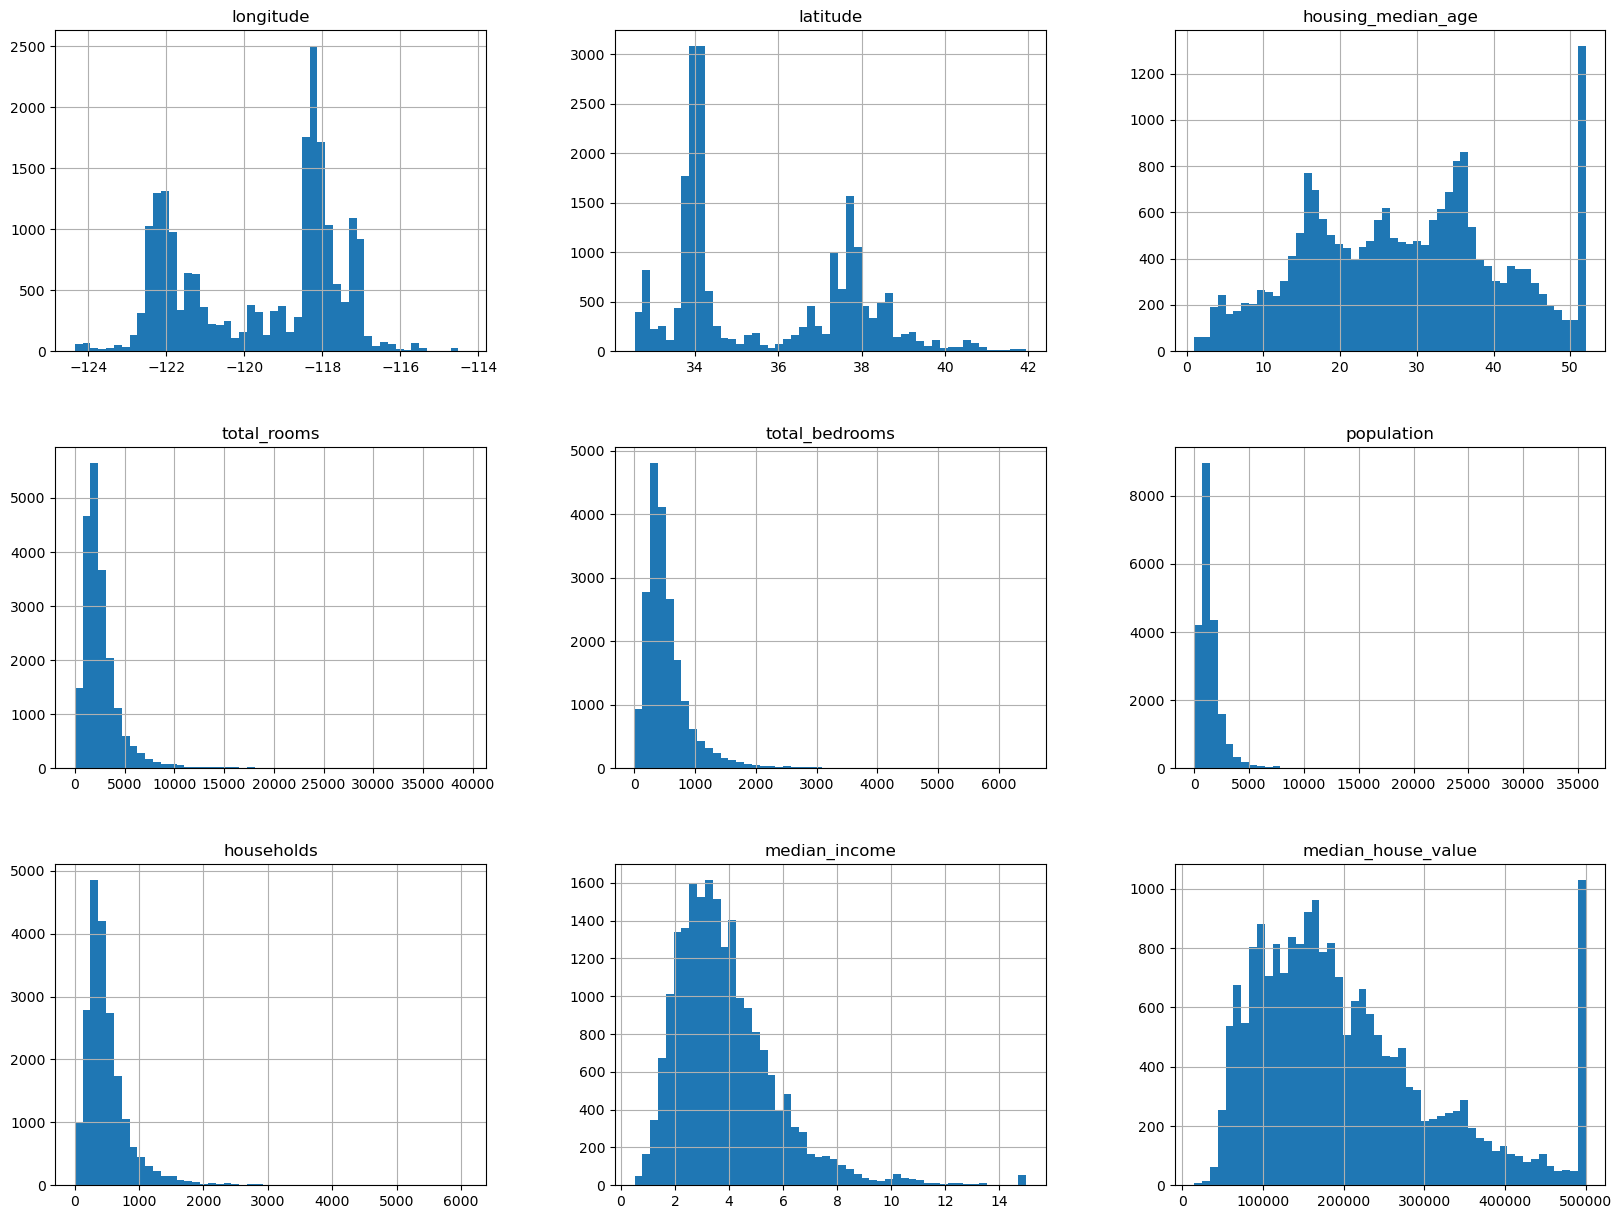

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

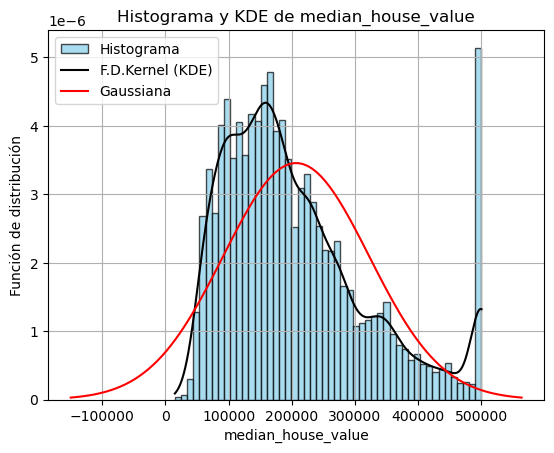

Área del histograma =  1.0 , luego verifica que es una funcion de densidad


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from scipy.stats import norm


# Datos de ejemplo (edad media de los edificios)
edades_edificios = df['median_house_value']

# Crear la función de densidad kernel (KDE)
kde = gaussian_kde(edades_edificios)

# La KDE suaviza el histograma de los datos, proporcionando una estimación continua 
# de la función de densidad de probabilidad. La suavidad de la KDE está controlada 
# por un parámetro de ancho de banda, que determina cuánto se suavizan los datos. 
# Un ancho de banda más pequeño produce una estimación más detallada pero más ruidosa
# mientras que un ancho de banda más grande produce una estimación más suave pero menos detallada
# Basicamente hacer una interpolacion

# Calcular los puntos para graficar la función de densidad
x = np.linspace(min(edades_edificios), max(edades_edificios), 1000)
y = kde(x)

# Graficar el histograma y la función de densidad
hist, bins = np.histogram(edades_edificios, bins=10, density=True)
plt.hist(edades_edificios, bins=50, density=True, color='skyblue', edgecolor='black', alpha=0.7, label='Histograma')
plt.plot(x, y, color='black', label='F.D.Kernel (KDE)')
plt.title('Histograma y KDE de median_house_value')
plt.xlabel('median_house_value')
plt.ylabel('Función de distribución')

dist = norm(loc=np.mean(df['median_house_value']), scale=np.std(df['median_house_value']))
x = np.linspace(dist.ppf(0.001),
                dist.ppf(0.999), 100)
plt.plot(x, dist.pdf(x), "r-", label="Gaussiana")
plt.legend()

plt.legend()
plt.grid(True)
plt.show()

# Calcular el ancho de cada barra del histograma
widths = np.diff(bins)

# Calcular el área total del histograma
area_histograma = np.sum(hist * widths)

print("Área del histograma = ", area_histograma, ", luego verifica que es una funcion de densidad")

Text(0.5, 0, 'median_house_value')

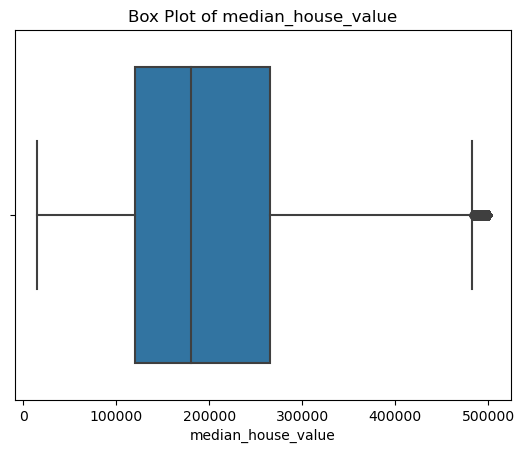

In [6]:
# Create a box plot
g = sns.boxplot(data = df, x = 'median_house_value')

# Add a title and change xlabel
g.set_title('Box Plot of median_house_value')
g.set_xlabel('median_house_value')

In [7]:
# Calculate the percentiles
Q75 = df['median_house_value'].quantile(0.75)
Q25 = df['median_house_value'].quantile(0.25)

# Obtain IQR
IQR = Q75 - Q25

# Upper and lower thresholds
lim_sup = Q75 + (1.5 * IQR)
lim_inf = Q25 - (1.5 * IQR)

print('IQR: ', IQR, '\nQ75: ', Q75, '\nQ25: ', Q25, '\nlim_inf: ', lim_inf, '\nlim_sup: ', lim_sup)

outliers = df[(df['median_house_value'] < lim_inf) | (df['median_house_value'] > lim_sup)]
print(f'Number of outliers: {len(outliers)}')

# Observamos que el lim_inf no se corresponde al de la figura. Esto se debe a que nuestra funcion de densidad no es simetrica
# es decir, está sesgada. Además, como tiene una cola hacia la derecha, el sesgo es positivo y por tanto Me < Media y la 
# distancia de Q3 a Q2 es mayor que la de Q1 a Q2, por tanto, cuando calculamos el lim_inf nos sale negativo

IQR:  145125.0 
Q75:  264725.0 
Q25:  119600.0 
lim_inf:  -98087.5 
lim_sup:  482412.5
Number of outliers: 1071


In [14]:
lim_inf = Q25 - (1.5 * (IQR + Q75 - df['median_house_value'].median()))
lim_inf

-225625.0

In [8]:
#coeficiente de asimetría de Fisher-Pearson 
df['median_house_value'].skew()

# Como sale positiva, comprobamos que la distribución es asimétrica a derechas

0.9777632739098341

In [9]:
#coeficiente de curtosis
df['median_house_value'].kurt()

# Como es menor que 3 la distribución es Platicúrtica, distribución con colas menos largas que la normal

0.3278702429465872